# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [137]:
import pandas as pd

att = pd.read_csv("attendance.csv", delimiter=';')
data = pd.read_csv("data.csv")
scores = pd.read_csv("scores.csv",header=None)

data.past_failures = [str(el)[-1] for el in data['plans_university']]
data.plans_university = [int(str(el)[:-1]) for el in data['plans_university']]
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-1,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,-1,2
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,-1,0


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [138]:
data.isna().sum()

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
famrel               0
freetime             0
goout                1
Dalc                10
Walc                 6
health               0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
nursery              0
plans_university     0
past_failures        0
dtype: int64

In [139]:
data = data.fillna(value = {"goout":data.goout.mode()[0], "Dalc":data.Dalc.mode()[0], "Walc":data.Walc.mode()[0]})

In [140]:
data.isna().sum()

age                 0
Medu                0
Fedu                0
traveltime          0
studytime           0
famrel              0
freetime            0
goout               0
Dalc                0
Walc                0
health              0
sex_M               0
address_U           0
famsize_LE3         0
Pstatus_T           0
nursery             0
plans_university    0
past_failures       0
dtype: int64

In [141]:
att = att.fillna(0).replace('+', 1)

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [142]:
data.plans_university = data.plans_university.replace(-1, 0)

In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.13420487,  1.31021563,  1.54071544, ...,  0.49566257,
         0.34491378, -0.37430512],
       [-0.13027672,  1.31021563,  1.54071544, ...,  0.49566257,
         0.34491378, -0.37430512],
       [-0.13420487, -1.33603938, -1.18883229, ...,  0.49566257,
         0.34491378, -0.37430512],
       ...,
       [-0.1145641 , -1.33603938, -1.18883229, ...,  0.49566257,
        -2.89927527,  2.99963963],
       [-0.13420487, -0.45395438, -0.27898305, ...,  0.49566257,
        -2.89927527, -0.37430512],
       [-0.13420487, -0.45395438,  0.63086619, ...,  0.49566257,
         0.34491378, -0.37430512]])

In [144]:
scores

,0
0,70.0
1,85.0
2,45.0
3,55.0
4,55.0
...,...
644,50.0
645,75.0
646,50.0
647,40.0


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cross_validate(model, data, scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.00870013, 0.00514936, 0.00203466, 0.00701118]),
 'score_time': array([0.00758338, 0.00725555, 0.00621176, 0.0015204 ]),
 'test_neg_mean_absolute_error': array([-10.36606158, -11.39302666, -10.54749054, -10.72895674]),
 'test_neg_mean_absolute_percentage_error': array([-1.11209347e+15, -5.12811155e+15, -7.61802029e+15, -6.35224266e+15]),
 'test_neg_mean_squared_error': array([-170.27934377, -243.93383709, -243.11992679, -229.35315899])}

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

scaled_model = LinearRegression()
cross_validate(scaled_model, scaled_data, scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.00434327, 0.0012455 , 0.00318122, 0.00151253]),
 'score_time': array([0.00307751, 0.00361228, 0.00399828, 0.00412035]),
 'test_neg_mean_absolute_error': array([-10.36606158, -11.39302666, -10.54749054, -10.72895674]),
 'test_neg_mean_absolute_percentage_error': array([-1.11209347e+15, -5.12811155e+15, -7.61802029e+15, -6.35224266e+15]),
 'test_neg_mean_squared_error': array([-170.27934377, -243.93383709, -243.11992679, -229.35315899])}

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [147]:
supp = list(map(lambda x : x-1, list(pd.read_csv("school_support.txt", header=None)[0])))
data['supp'] = [0]*len(data)
data.loc[supp, 'supp'] = 1
data.loc[supp]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp
574,18,4,2,1,2,4,3,2.0,1.0,4.0,5,1,1,0,1,1,1,0,1
55,16,4,2,2,2,5,3,3.0,1.0,1.0,1,0,1,0,1,1,1,0,1
480,18,3,3,2,1,4,1,1.0,1.0,1.0,3,0,1,0,1,1,0,1,1
546,16,2,2,1,2,4,4,4.0,1.0,1.0,3,1,1,1,1,1,1,0,1
558,16,3,3,3,2,5,3,2.0,1.0,1.0,4,0,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,18,1,1,1,1,2,3,5.0,2.0,5.0,4,1,1,1,1,1,0,2,1
372,17,1,0,1,1,4,1,2.0,1.0,1.0,5,1,1,1,0,1,1,0,1
343,17,3,3,2,2,4,5,4.0,2.0,3.0,3,1,1,0,1,1,1,1,1
230,18,1,1,2,2,4,4,3.0,1.0,1.0,3,0,1,1,1,0,1,0,1


In [148]:
data['att'] = att.transpose().sum()
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,0,26
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,0,30
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0,32
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,0,0,0,22
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,0,30
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,0,30
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,0,2,0,11
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,0,0,0,26


In [149]:
model = LinearRegression()
cross_validate(model, data, scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.        , 0.00821519, 0.00501418, 0.        ]),
 'score_time': array([0.00827837, 0.00289392, 0.00700855, 0.00952816]),
 'test_neg_mean_absolute_error': array([-10.34464854, -11.45581176, -10.56251966, -10.72801809]),
 'test_neg_mean_absolute_percentage_error': array([-1.11885940e+15, -5.20645146e+15, -7.71777941e+15, -6.46948010e+15]),
 'test_neg_mean_squared_error': array([-170.04524356, -245.47623289, -246.66089086, -230.08525155])}

In [150]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.13420487,  1.31021563,  1.54071544, ..., -0.37430512,
        -0.34211049, -0.50472977],
       [-0.13027672,  1.31021563,  1.54071544, ..., -0.37430512,
        -0.34211049,  0.35786305],
       [-0.13420487, -1.33603938, -1.18883229, ..., -0.37430512,
        -0.34211049,  0.78915946],
       ...,
       [-0.1145641 , -1.33603938, -1.18883229, ...,  2.99963963,
        -0.34211049, -3.73945285],
       [-0.13420487, -0.45395438, -0.27898305, ..., -0.37430512,
        -0.34211049, -0.50472977],
       [-0.13420487, -0.45395438,  0.63086619, ..., -0.37430512,
        -0.34211049,  0.35786305]])

In [151]:
scaled_model = LinearRegression()
cross_validate(scaled_model, scaled_data, scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.00203943, 0.00218987, 0.00344372, 0.00210094]),
 'score_time': array([0.00346828, 0.00338697, 0.00313091, 0.00319982]),
 'test_neg_mean_absolute_error': array([-10.34464854, -11.45581176, -10.56251966, -10.72801809]),
 'test_neg_mean_absolute_percentage_error': array([-1.11885940e+15, -5.20645146e+15, -7.71777941e+15, -6.46948010e+15]),
 'test_neg_mean_squared_error': array([-170.04524356, -245.47623289, -246.66089086, -230.08525155])}

In [152]:
data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,0,26
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,0,30
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0,32
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,0,0,0,22
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,0,30
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,0,30
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,0,2,0,11
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,0,0,0,26


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'goout'}>],
       [<AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'sex_M'}>],
       [<AxesSubplot:title={'center':'address_U'}>,
        <AxesSubplot:title={'center':'famsize_LE3'}>,
        <AxesSubplot:title={'center':'Pstatus_T'}>,
        <AxesSubplot:title={'center':'nursery'}>],
       [<AxesSubplot:title={'center':'plans_university'}>,
        <AxesSubplot:title={'center':'supp'}>,
        <AxesSubplot:title={'center':'att'}>, <AxesSubplot:>]],
      dtype=object)

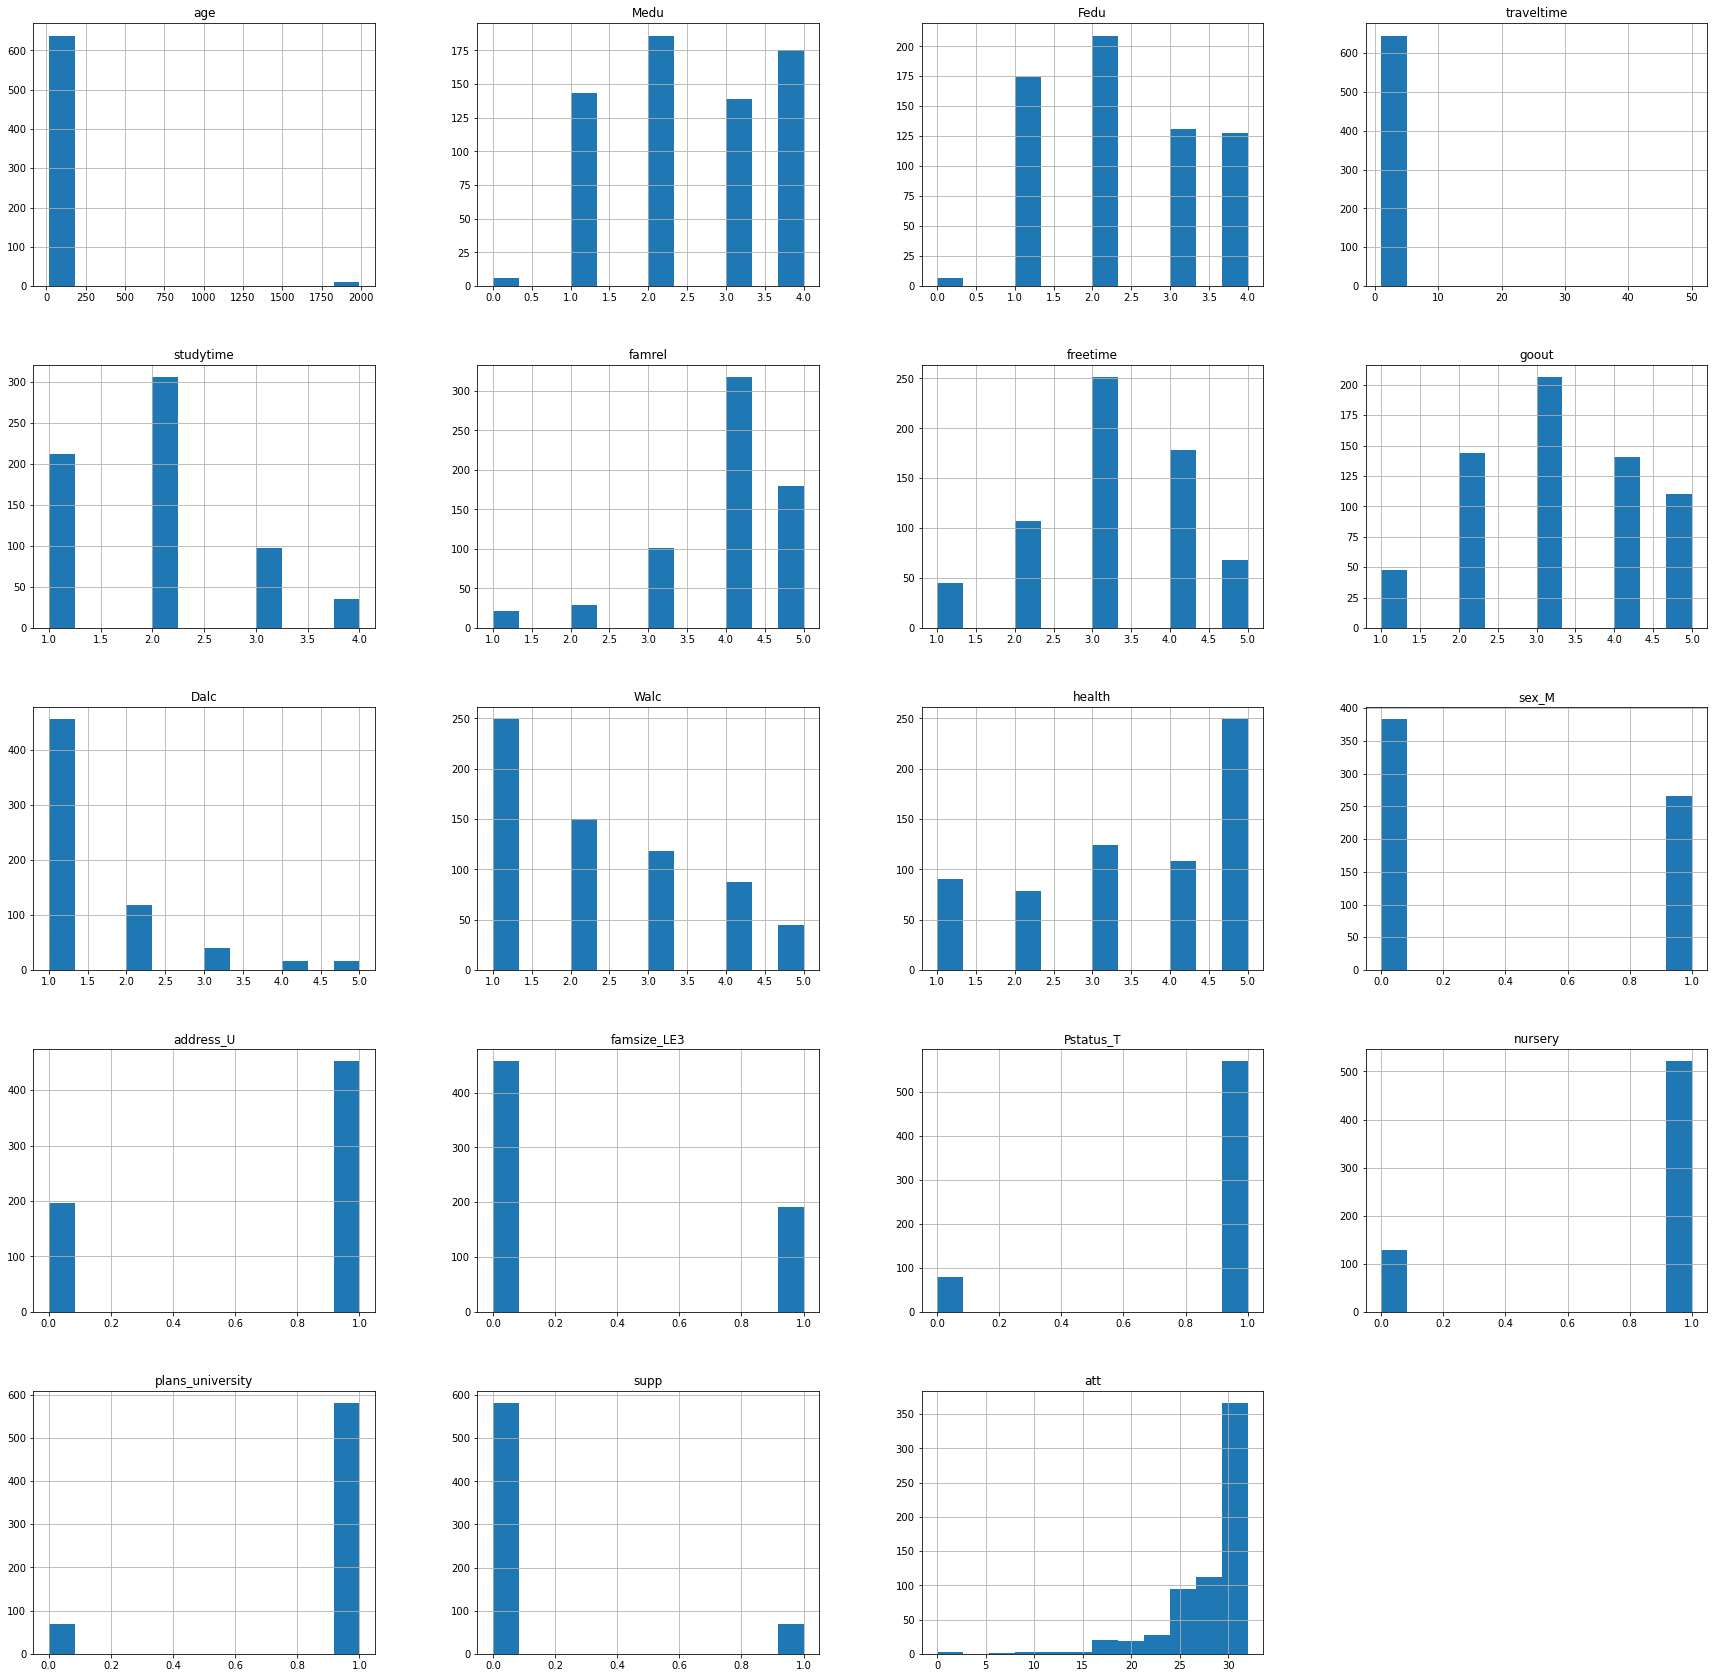

In [153]:
data.hist(figsize=(30, 30), bins=12)

In [154]:
data[data.age>20].head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att
30,1987,3,2,1,1,5,3,4.0,2.0,2.0,5,1,0,0,1,0,1,0,0,32
71,1988,4,4,2,2,4,3,5.0,1.0,2.0,1,0,1,0,1,0,1,0,0,32
75,1989,4,4,1,1,4,2,1.0,1.0,1.0,4,0,1,0,1,1,1,0,1,32
287,1988,2,2,2,1,5,5,5.0,1.0,1.0,3,0,0,0,1,1,0,1,0,32
344,1990,2,3,1,2,4,4,3.0,1.0,3.0,4,0,1,0,1,1,1,0,0,28


In [155]:
data.loc[data.age>1900, 'age'] -= 2006
data.loc[data.age<0, 'age'] *= -1

In [156]:
data[data.traveltime>4]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att
70,16,4,2,10,2,4,2,3.0,1.0,1.0,3,0,1,0,1,1,1,0,0,32
250,18,1,2,25,2,4,3,3.0,1.0,1.0,5,0,1,0,0,1,1,2,0,30
498,19,1,1,50,2,5,4,4.0,3.0,3.0,2,1,0,0,1,1,1,1,0,24
648,16,2,3,40,2,4,5,4.0,1.0,2.0,1,0,0,0,1,1,1,0,0,30


In [157]:
data.loc[70] = 1
data.loc[250] = 2
data.loc[498] = 3
data.loc[648] = 3

data[data.traveltime>4]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

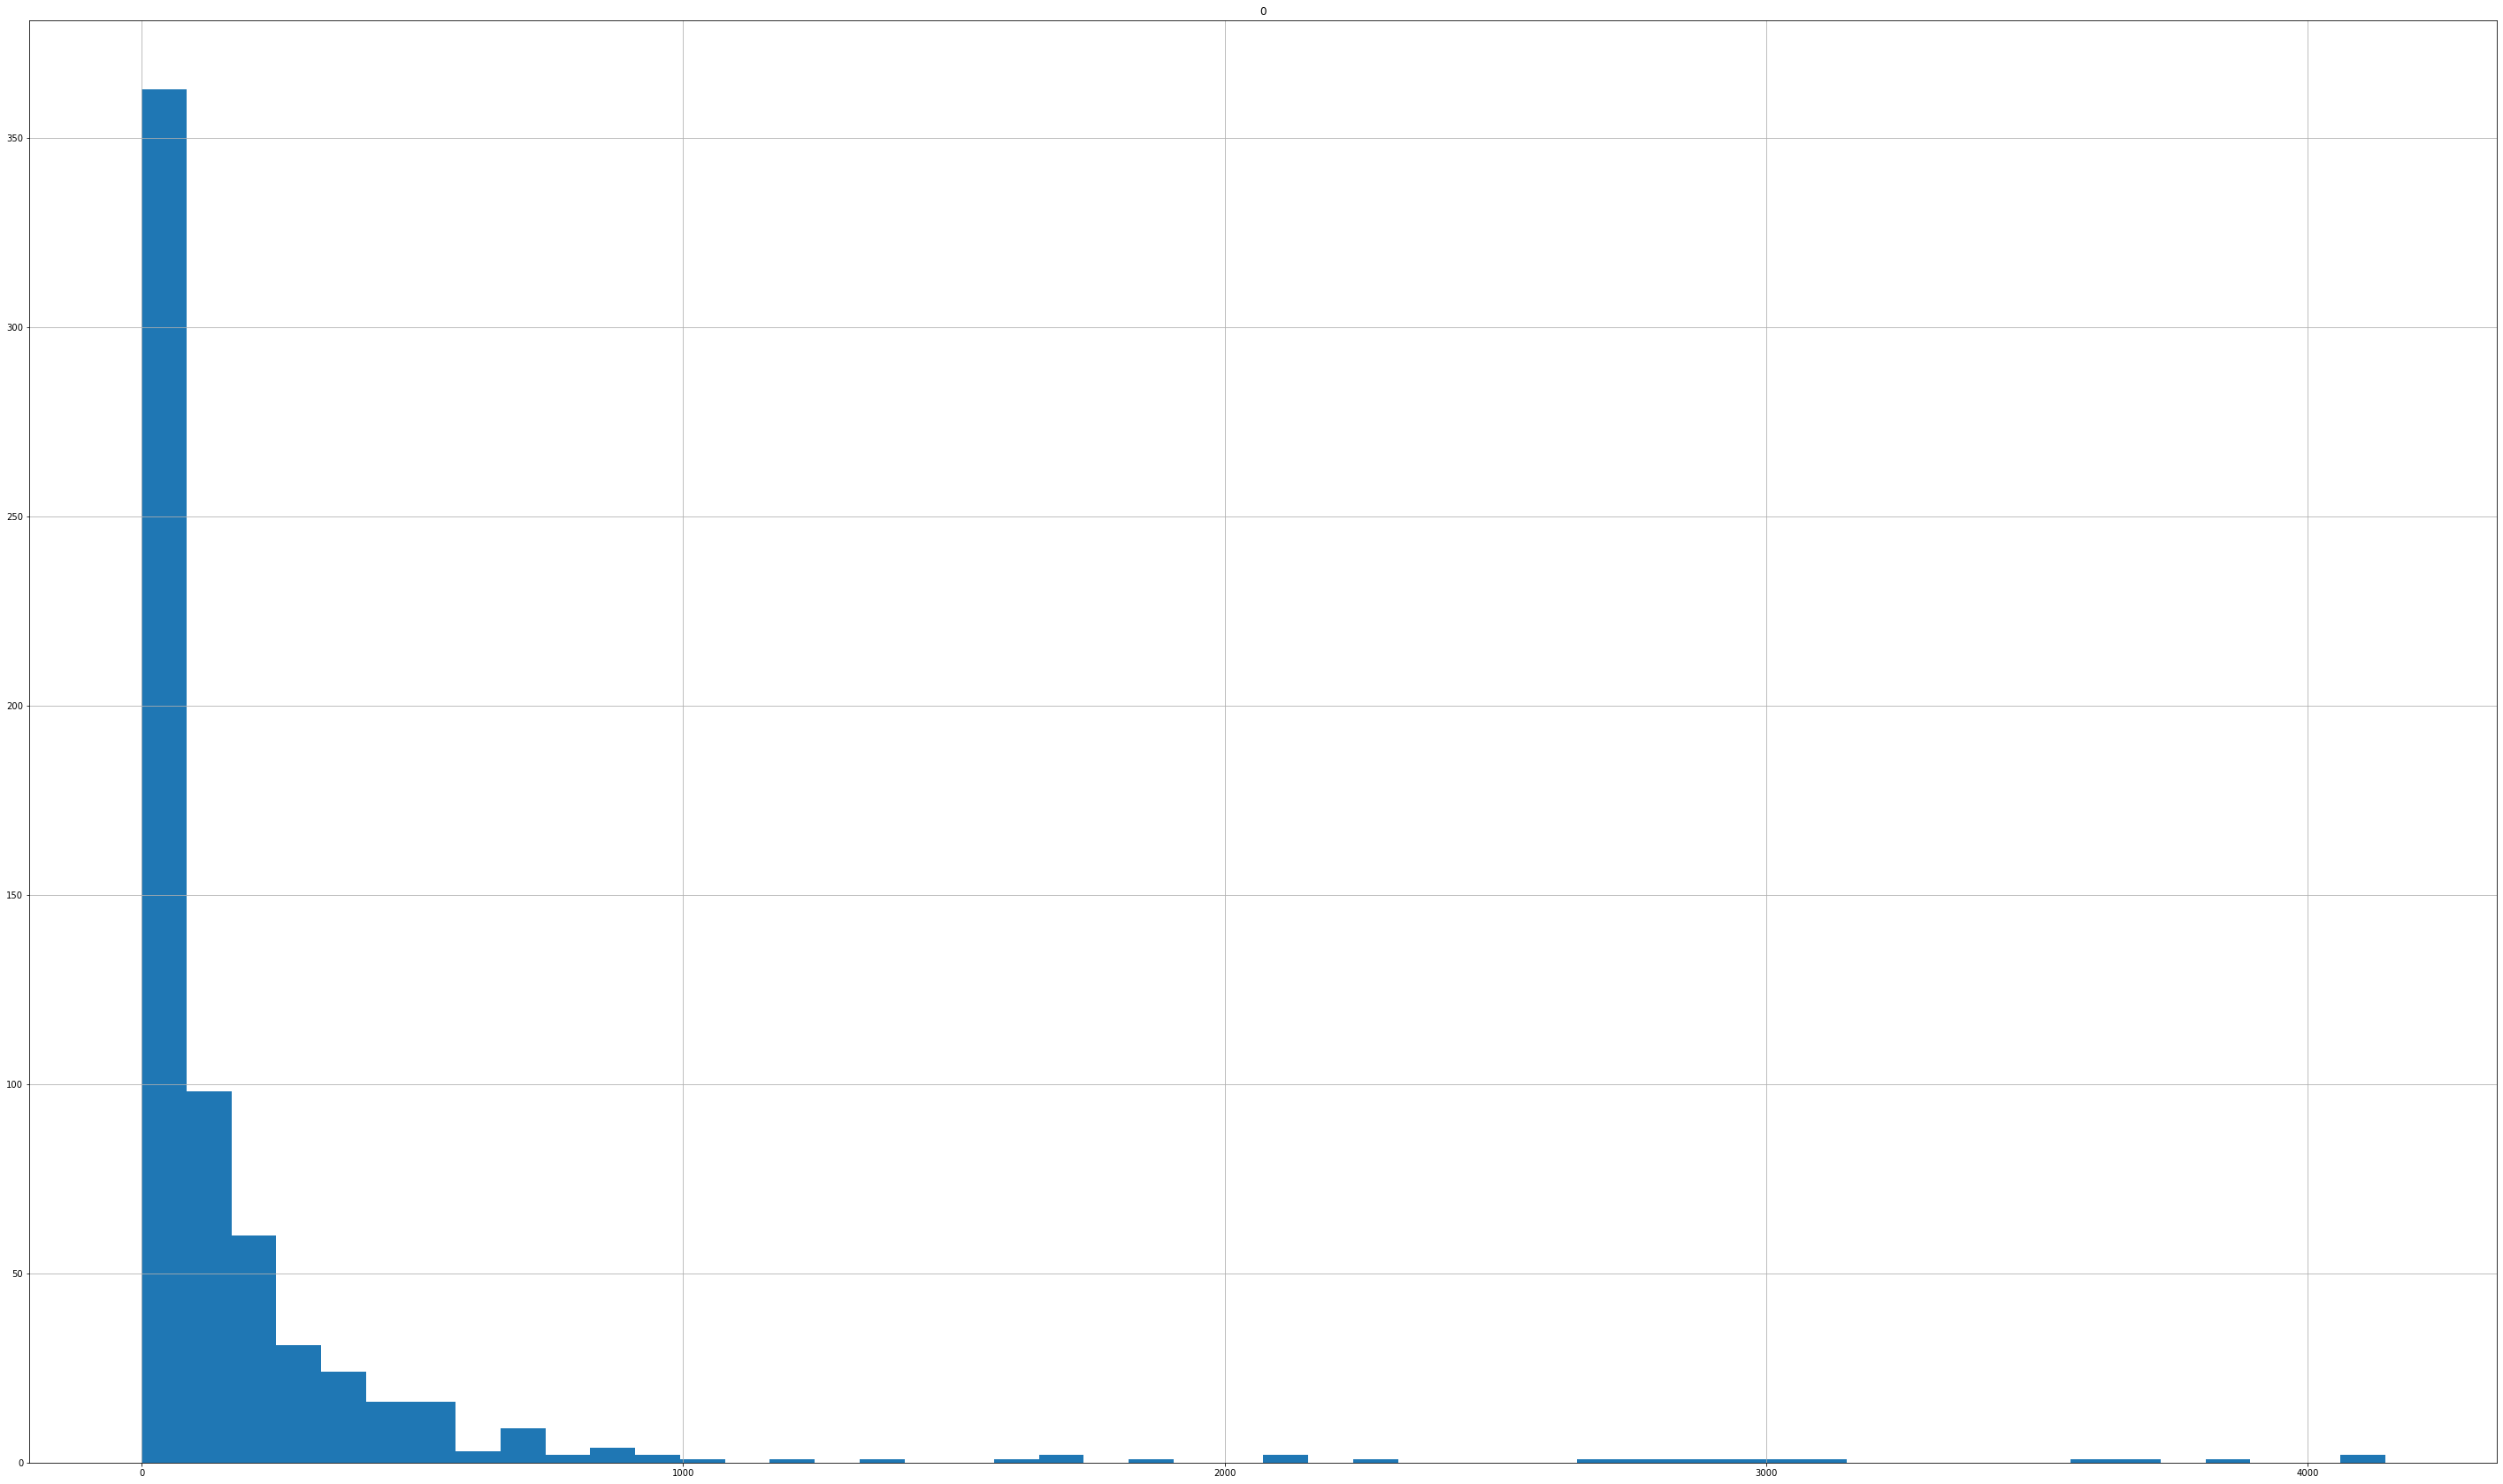

In [158]:
regression = LinearRegression().fit(data, scores) #create model and train it
prediction = regression.predict(data)
error = (prediction - scores)**2 #simple error - square error
error.hist(bins=50, figsize=(50, 30))

In [159]:
cleared_data = data.drop(error[error[0]>1000].index)
cleared_scores = scores.drop(error[error[0]>1000].index)
cleared_data

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,supp,att
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,1,0,0,26
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,1,0,0,30
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,1,0,0,32
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,0,0,0,22
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,1,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,18,2,2,4,2,4,2,5.0,1.0,1.0,2,0,1,0,1,1,1,0,0,30
645,15,4,4,2,2,4,3,1.0,1.0,1.0,5,1,1,0,1,1,1,0,0,30
646,21,1,1,2,2,5,3,3.0,5.0,2.0,4,1,0,1,1,1,0,2,0,11
647,16,2,2,1,1,4,3,4.0,1.0,2.0,1,0,1,1,0,1,0,0,0,26


### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

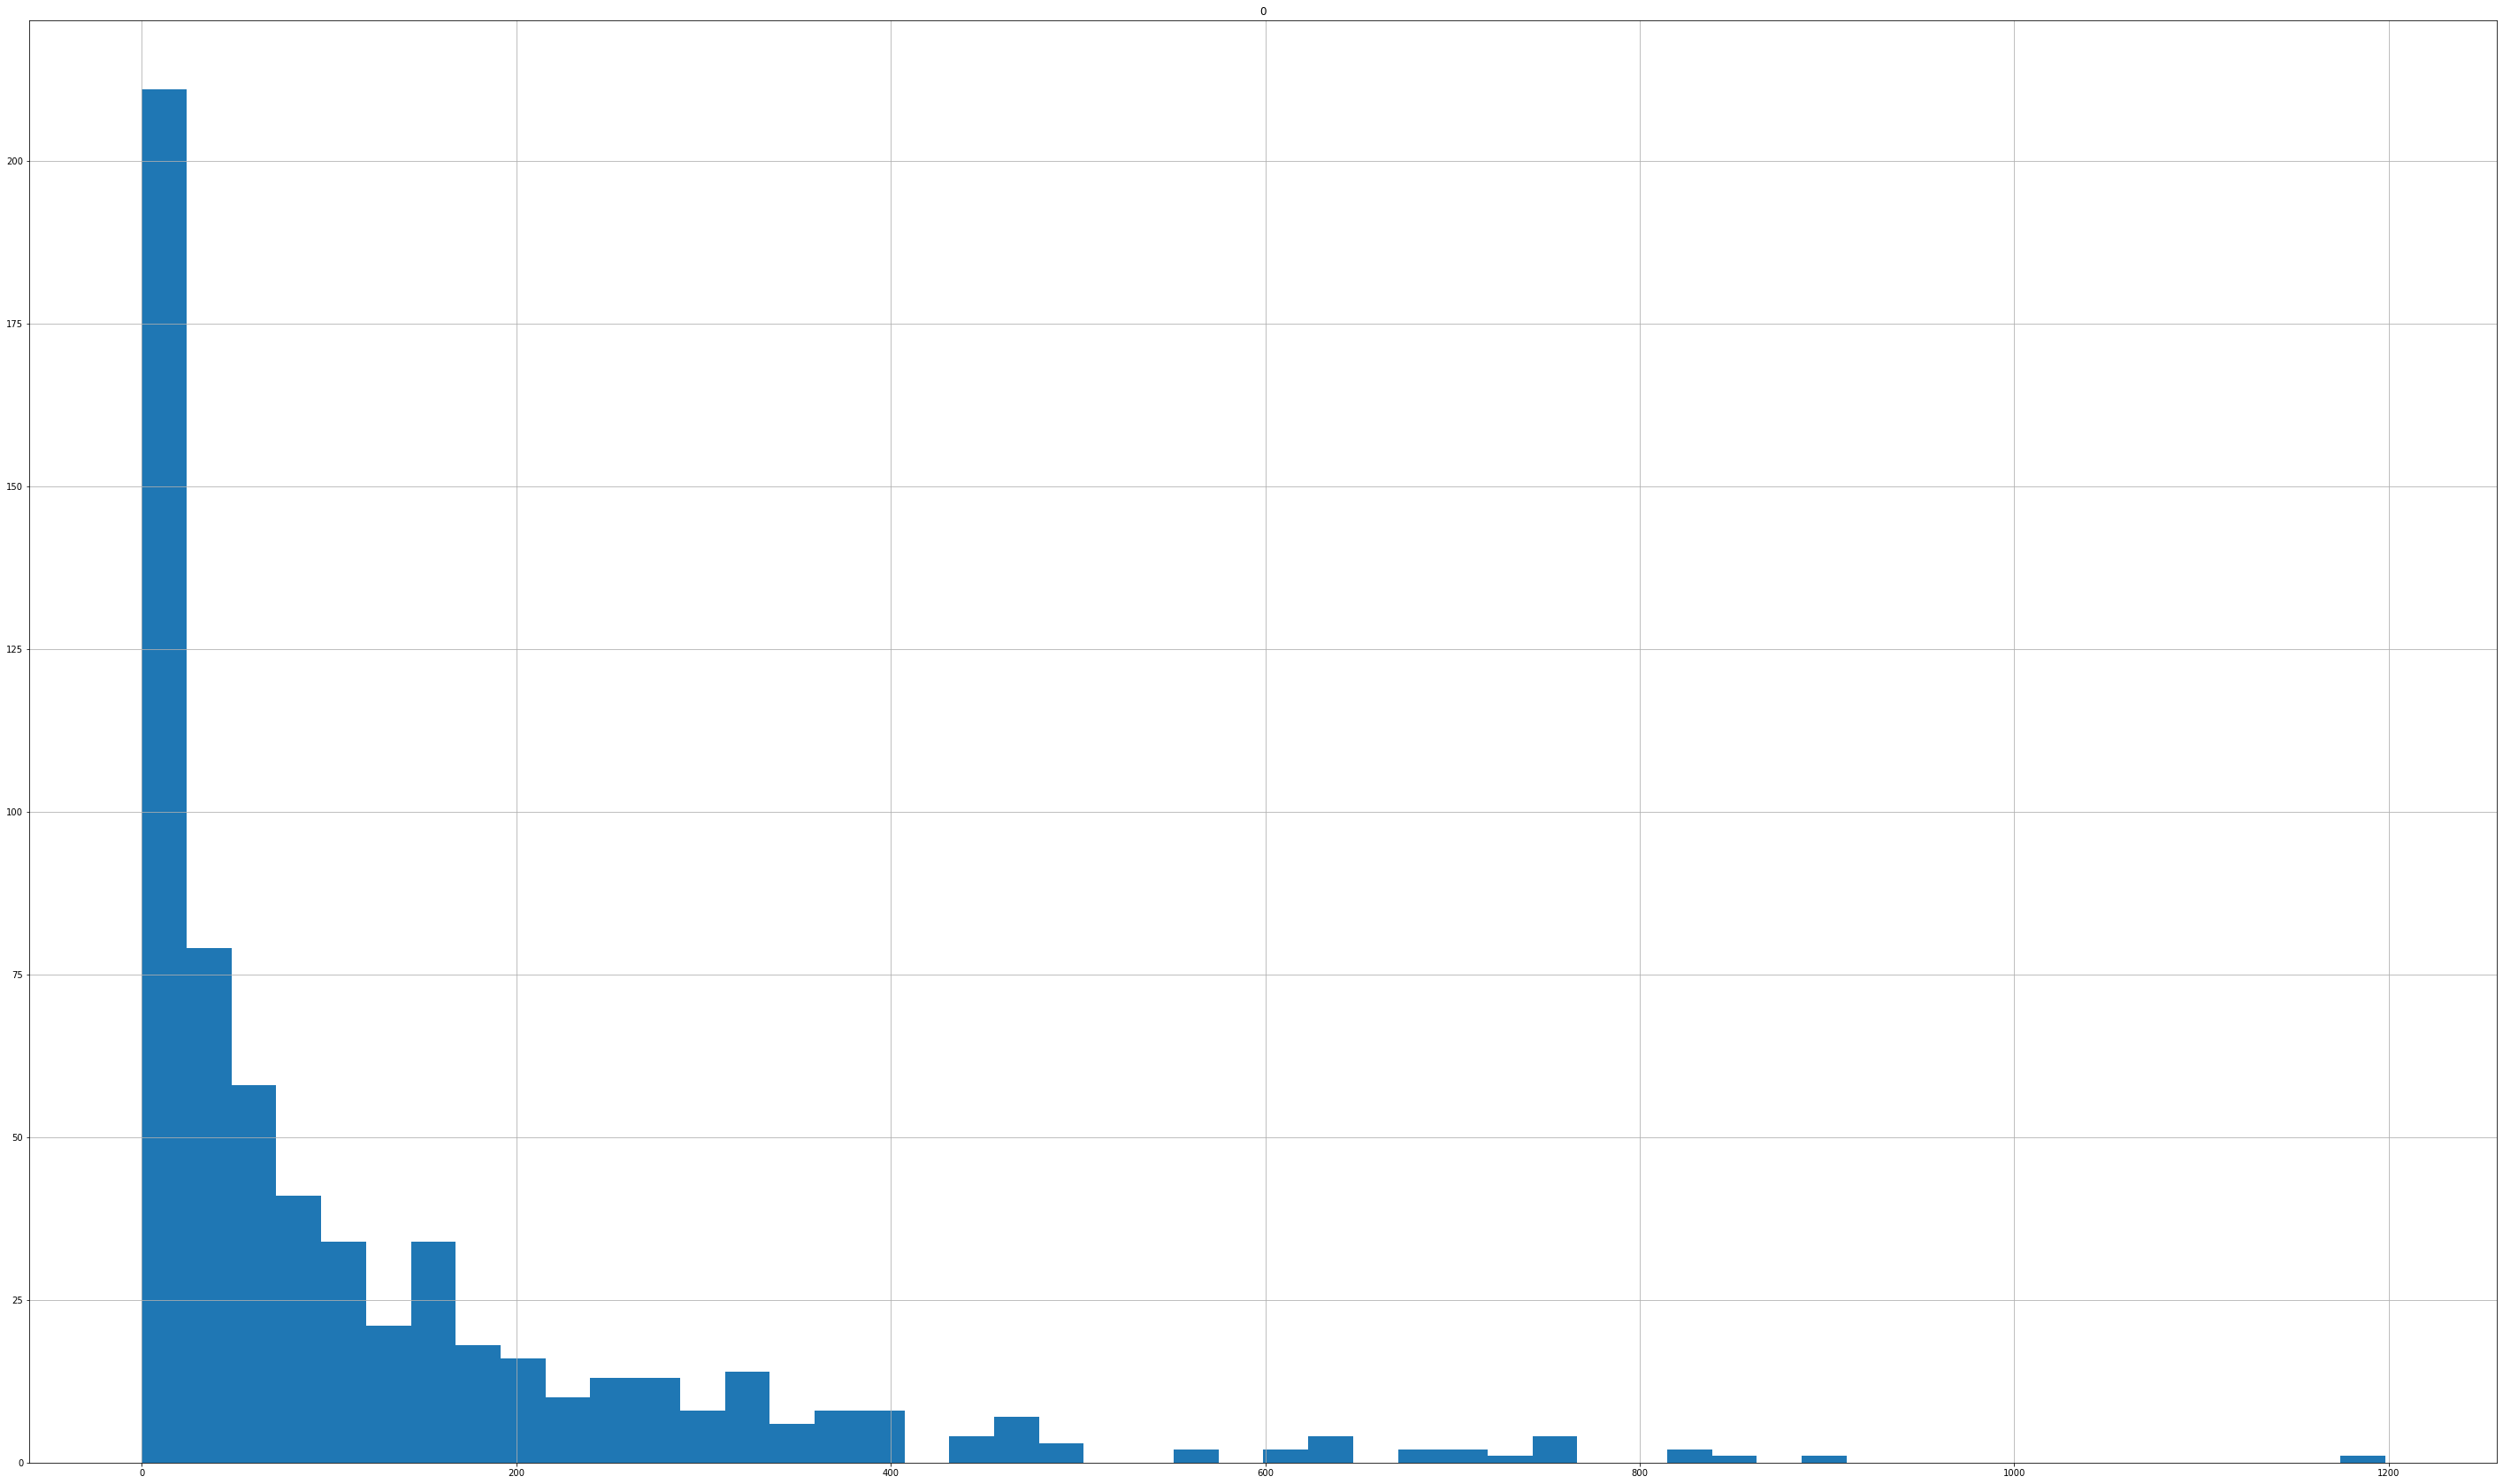

In [160]:
regression = LinearRegression().fit(cleared_data, cleared_scores) #create model and train it
prediction = regression.predict(cleared_data)
error = (prediction - scores.drop(error[error[0]>1000].index))**2 #simple error - square error
error.hist(bins=50, figsize=(50, 30))

In [161]:
model = LinearRegression()
cross_validate(model, data, scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.00626135, 0.00691342, 0.00628877, 0.00501251]),
 'score_time': array([0.00761938, 0.00633717, 0.00410318, 0.00802422]),
 'test_neg_mean_absolute_error': array([-10.43228429, -11.5684742 , -10.42606501, -10.71213565]),
 'test_neg_mean_absolute_percentage_error': array([-1.12497864e+15, -5.19631846e+15, -7.66335783e+15, -6.61803038e+15]),
 'test_neg_mean_squared_error': array([-176.04831732, -250.66038436, -242.49744814, -230.78372359])}

In [162]:
model = LinearRegression()
cross_validate(model, cleared_data, cleared_scores, cv=4, scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error'])

{'fit_time': array([0.00423741, 0.00534225, 0.00641537, 0.00357103]),
 'score_time': array([0.00549936, 0.00528526, 0.00531006, 0.        ]),
 'test_neg_mean_absolute_error': array([-9.80484501, -9.93619593, -7.98401709, -9.35162704]),
 'test_neg_mean_absolute_percentage_error': array([-1.59422159e-01, -8.71714460e+14, -1.32831354e-01, -1.09400222e+15]),
 'test_neg_mean_squared_error': array([-146.28493952, -145.14413555, -104.20759991, -138.15477815])}

Наибольшей точности удалось добиться на обучающей выборке путём удаления элементов с слишком большой ошибкой, но, по какой-то причине, нормализация ничего не меняла, а удаление выбросов и добавление новых столбцов по какой-то причине только увеличивало MSE